(ch:smapling)=
# 모집단과 표본

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/statsRev/tree/master/data)를 지정한다.

In [5]:
data_url = 'https://raw.githubusercontent.com/codingalzi/statsRev/refs/heads/master/data/'

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [6]:
import matplotlib.pyplot as plt

**주요 내용**

이 장에서는 모집단과 표본, 무작위 추출과 층화표집의 차이 등 추측통계의 기본 개념을 설명하고, 표본추출의 구체적인 과정들을 살펴본다.

## 모집단

모집단<font size='2'>population</font>은 통계적 성질을 알고자 하는 관측 대상들의 집단 전체를 가리킨다.
반면에 표본<font size='2'>sample</font>은 관측 대상 중에 실제로 측정된 또는 관찰된 결과들의 집합이다.
표본추출<font size='2'>sampling</font>은 모집단에서 표본을 선택하는 과정이다.

모집단에 대한 평균값과 분산인 모평균, 모분산 등은 모수<font size='2'>parameter</font>라 부르며, 표본추출을 통해 얻어진 표본의 평균값, 분산 등이 (표본)통계량<font size='2'>statistic</font>이라 부른다.
모수를 파악하는 일은 일반적으로 매우 어렵거나 불가능하다. 따라서 표본통계량을 이용하여 모수를 추정하며,
이런 의미에서 표본평균, 표본분산 등을 모수에 대한 추정값으로 부른다.
이런 과정을 통틀어 추측통계<font size='2'>inferential statistics</font>라 부른다.
아래 그림은 추측통계의 주요 개념인 모집단, 표본, (표본)통계량, 모수의 관계를 설명한다.

<p><div align="center"><img src="https://github.com/codingalzi/statsRev/blob/master/jupyter-book/images/sampling.png?raw=true" style="width:500px"></div></p>

### 캘리포니아 주택가격 데이터셋

이 장부터 다룰 통계 데이터의 모집단은 캘리포니아 주택가격 데이터이다. 1990년도에 시행된 미국 캘리포니아 주의 20,640개 구역별 주택가격 데이터셋은
구역별로 경도, 위도, 주택 건물 중위연령, 총 방 수, 총 침실 수, 인구, 가구수, 중위가구소득, 중위주택가격, 해안근접도
등 총 10개의 **특성**<font size='2'>feature</font>을 포함하는 인구조사 자료다.
통계 분야에서는 특성을 변수 또는 변인 등으로 부르지만 머신러닝 분야에서는 특성이라 부르는 게 일반적이다.
또한 지금부터는 편의상 '중위가구소득'을 '가구소득', '중위주택가격'을 '주택가격'으로 부르기로 한다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch02/LA-USA01.png" width="600"></div></p>

**데이터 정보 요약**

데이터 기본저장소에서 캘리포니아 주택가격 데이터를 담고 있는 csv 파일을 데이터프레임으로 불러온다.
단, 앞으로 설명에 필요한 중위가구소득과 중위주택가격 특성만 포함된 데이터셋을 활용한다.

In [8]:
housing = pd.read_csv(data_url+"california_housing_mini.csv")
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


`info()` 메서드가 보여주는 캘리포니아 주택가격 데이터셋의 두 특성에 대한 정보는 다음과 같다.
원래 20,640 개 구역별로 10개의 특성 조사했지만 여기서는 가구소득<font size='2'>`median income`</font>과 주태가격<font size='2'>`median_house_value`</font> 두 특성만 포함되었음을 보여준다.

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_income       20640 non-null  float64
 1   median_house_value  20640 non-null  float64
dtypes: float64(2)
memory usage: 322.6 KB


**산점도 확인**

가구소득이 많을수록 비싼 집에 사는 경향이 클 것이므로,
주택가격과 가구소득의 산점도를 통해 이러한 경향을 확인해보자.
여기서는 `plot()` 함수가 자체적으로 제공하는 산점도 기능을 이용해본다.

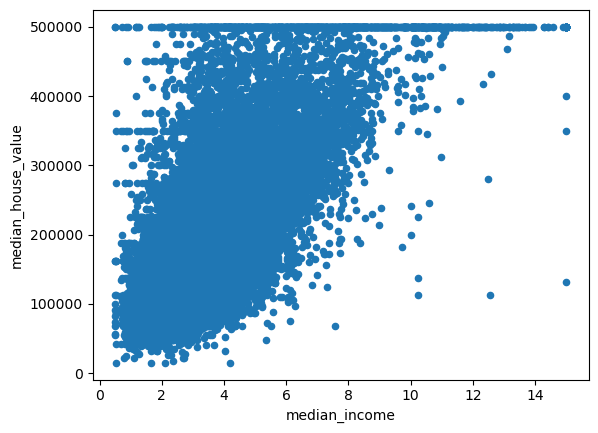

In [12]:
housing.plot(x='median_income', y='median_house_value', kind='scatter')
plt.show()

주택가격 500,000 부근에 직선 형태로 점들이 분포되어 있는데,
그 이유를 알아보기 위해 데이터의 수치적 지표들을 확인해본다.

In [13]:
housing.describe()

,median_income,median_house_value
count,20640.000000,20640.000000
mean,3.870671,206855.816909
std,1.899822,115395.615874
min,0.499900,14999.000000
25%,2.563400,119600.000000
50%,3.534800,179700.000000
75%,4.743250,264725.000000
max,15.000100,500001.000000


주택가격의 최댓값이 500,001인데 자연스럽지 못하다.
아마도 50만 달러 이상은 50만 1달러로 지정한 것으로 보인다.
따라서 50만 달러를 초과하는 데이터는 **이상치<font size='2'>outlier**</font>로 간주해 데이터셋에서 제외시키는 것이 바람직하다.

### 데이터 이상치 제거

주택가격이 50만 달러를 초과하는 데이터들을 삭제하기 위해 부울 인덱싱을 활용한다.

**부울 인덱싱**

부울 인덱싱<font size='2'>Boolean indexing</font>은
`True` 또는 `False`의 진리값으로만 구성된 어레이 또는 데이터프레임을 이용하여
`True`에 해당하는 행 또는 열만 남기고 나머지는 제거하는 기법이다.
부울 인덱싱에 사용되는 진리값으로만 구성된 1차원 어레이, 리스트, 데이터프레임을
마스크<font size='2'>mask</font>라 부른다.

주택가격이 50만 달러를 초과하는 구역을 삭제하기 위해
먼저 주택가격이 50만 달러를 초과하는 경우에만 `True` 값을 갖는 시리즈를 생성한다. 아래 코드에서는 단일값인 `house_value_max`를 시리즈와 비교하는데 브로드캐스팅 기능을 활용했다.

In [14]:
house_value_max = housing['median_house_value'].max() # 500,001

mask = housing['median_house_value'] >= house_value_max
mask

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: median_house_value, Length: 20640, dtype: bool

`mask`가 가리키는 어레이에는 총 965개의 `True`가 포함되어 있다. 즉, 주택가격이 50만 달러를 초과해서 제거해야 하는 구역이 총 965개이다.
`sum()` 메서드는 `True`는 1로, `False`는 0으로 취급한다.

In [16]:
mask.sum()

965

이제 50만 달러 이하의 경우만 남기기 위해 `mask`를 다음과 같이 이용한다.
물결 기호, 영어로 틸데<font size='2'>tilde</font> 기호 `~`는 부정 논리연산자이므로, `mask`에서 `False`인 데이터들만 새로운 데이터프레임으로 옮긴다. 새로운 데이터프레임의 모양을 체크해보면 965개의 항목이 제거되었음이 확인된다.

In [17]:
housing = housing[~mask]
housing.shape

(19675, 2)

이상치가 제거된 데이터셋의 산점도를 확인하면 이상치들이 제거되어 직선 형태이 점분포가 사라졌음을 알 수 있다.

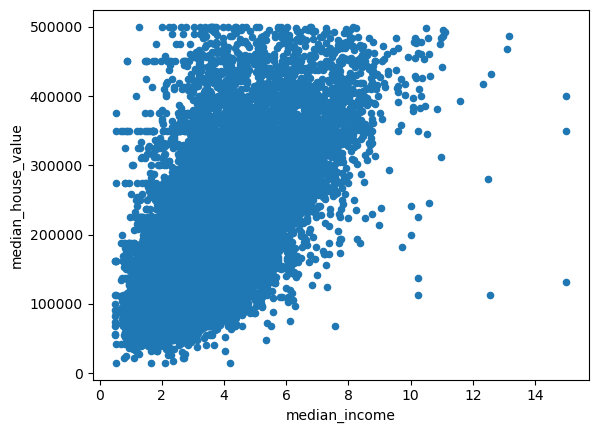

In [18]:
housing.plot('median_income', 'median_house_value', kind='scatter')
plt.show()

**인덱스 초기화**

965개의 이상치가 제거되면서 인덱스와 데이터셋의 크기가 매칭되지 않는다.

In [19]:
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


아래 코드는 인덱스를 초기화하여 0부터 19,674까지의 새로운 기본 정수 인덱스로 지정되도록 한다.

데이터프레임의 `reset_index()` 메서드는 기존 인덱스를 일반 열(특성)으로 변환하고, 0부터 시작하는 새로운 정수 인덱스를 생성한다. `drop=True` 인자는 기존 인덱스의 열을 제거하도록 지정하며, 생략하거나 `drop=False`를 사용하면 새로운 정수 인덱스 열의 오른쪽에 `index`라는 일반 특성으로 남겨진다.

In [20]:
housing = housing.reset_index(drop=True)

새로운 정수 인덱스의 이름을 구역이라는 뜻의 `district`로 설정한다.

In [21]:
housing.index.name = 'district'
housing

,median_income,median_house_value
district,,
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
19670,1.5603,78100.0
19671,2.5568,77100.0
19672,1.7000,92300.0


## 표본

19,675개 구역의 1%에 해당하는 1,968개 구역의 데이터를 선택하여 표본으로 지정한다.
표본추출은 보통 무작위 추출 방식으로 진행되지만 경우에 따라 층화표집도 자주 사용된다.
여기서는 두 표본추출 방식을 소개하고, 이들의 차이점을 살펴본다.

### 무작위 추출

무작위 추출은 모집단에서 임의로 하나의 값을 선택하는 방법이다.
아래 코드는 `housing`에 포함된 전체 구역의 1%를 무작위로 선택하기 위해
데이터프레임의 `sample()` 메서드를 활용한다.

`sample()` 메서드의 주요 인자는 다음과 같다.
- `frac` 또는 `n`: `frac`은 전체 데이터 대비 샘플링의 비율을, `n`은 샘플의 개수를 설정함. 예를 들어, `frac=0.01`로 지정하면 전체 데이터의 1%를 추출하고, `n=100`으로 지정하면 100개의 샘플을 추출함.
- `random_state`: 무작위 추출의 시드(seed) 값으로, 임의의 정수로 설정하면 됨. 시드를 지정하면 매번 동일한 무작위 샘플이 생성되어 이후 작업의 결과를 동일하게 유지할 수 있으나, 지정하지 않으면 매번 다른 무작위 샘플이 추출되므로 이후 작업의 동일한 재현은 거의 불가능해짐.

In [22]:
random_sampling = housing.sample(frac=0.01, random_state=42)
random_sampling

,median_income,median_house_value
district,,
14447,1.8357,104200.0
13921,4.2109,171200.0
12981,4.0481,97300.0
2579,3.5380,102700.0
12162,2.2000,116500.0
...,...,...
6415,3.3750,260400.0
218,2.8750,143800.0
18090,3.2768,117600.0


**표본통계량 vs 모수**

무작위로 선택된 1,968개 샘플들의 통계 정보는 다음과 같다.

In [23]:
random_sampling.describe()

,median_income,median_house_value
count,197.000000,197.000000
mean,3.742413,189908.121827
std,1.553336,93704.934938
min,0.980900,42100.000000
25%,2.584800,119300.000000
50%,3.538000,174500.000000
75%,4.642400,252600.000000
max,8.680300,479500.000000


모수, 즉 모집단의 통계 정보는 표본의 경우와 비슷하지만 약간 다르다.

In [24]:
housing.describe()

,median_income,median_house_value
count,19675.000000,19675.000000
mean,3.676717,192477.921017
std,1.570272,97711.509613
min,0.499900,14999.000000
25%,2.526800,116600.000000
50%,3.450000,173800.000000
75%,4.582600,248200.000000
max,15.000100,500000.000000


분산 또한 표본과 모집단의 정보가 조금 다르다.
모집단의 경우엔 편향분산을 사용해야 하며,
[6장](https://codingalzi.github.io/statsRev/oneD_data.html)에서 설명한 대로 표본의 불편분산은 (편향)분산보다 조금 더 크다.

- 모집단의 (편향)분산

In [28]:
housing.var(ddof=0) # ddof=1 이 기본값

median_income         2.465628e+00
median_house_value    9.547054e+09
dtype: float64

- 표본의 불편분산

In [26]:
random_sampling.var() # ddof=1 이 기본값

median_income         2.412851e+00
median_house_value    8.780615e+09
dtype: float64

- 표본의 (편향)분산

In [27]:
random_sampling.var(ddof=0)

median_income         2.400603e+00
median_house_value    8.736043e+09
dtype: float64

이번 표본의 경우, 가구소득과 주택가격의 불편분산과 편향분산 모두 모분산에 비해 작게 나왔지만,
표본을 다르게 하면 다른 결과가 나온다.
예를 들어, 아래 코드는 무작위 추출의 시드를 17로 지정했을 때 두 경우 모두 보다 큰 분산이
계산됨을 보여준다.

In [35]:
random_sampling = housing.sample(frac=0.01, random_state=17)
random_sampling.var()  # 이번 표본의 불편분산

median_income         2.484291e+00
median_house_value    1.122830e+10
dtype: float64

In [36]:
random_sampling.var(ddof=0) # 이번 표본의 (편향)분산

median_income         2.471680e+00
median_house_value    1.117131e+10
dtype: float64

표본 불편분산의 기댓값이 모분산이 되는 것은 수학적으로 쉽게 증명 가능하다.
기댓값<font size='2'>expectation value</font>은 어떤 확률적 사건의 평균값을 말하는데,
자세한 설명은 [14장](https://codingalzi.github.io/statsRev/expected_values.html) 또는 [표본분산의 기댓값](https://hsm-edu.tistory.com/15)을 참고한다.

아래 두 개의 코드는 무작위 표본추출을 1만번 시행해서 불편분산들의 평균값과 편향분산들의 평균값 중 어느 값이 더 모분산에 가까운지 확인해보는 실험이다.

첫번째 코드는 불편분산의 평균값을 계산하는 부분이다.
각 반복에서 계산한 두 가지 값(`median_income`의 불편분산과 `median_house_value`의 불편분산)을 저장할 (10000, 2) 모양의 어레이를 0으로 초기화하여 준비한다. 시드 `seed`를 0부터 9999까지 증가시키면서 무작위 표본추출을 시행하고, 두 가지 불편분산을 계산해 `vars[seed]`에 저장한다.

반복이 끝난 후, `mean()` 메서드를 이용해 `vars` 어레이에 저장된 1만 개의 불편분산의 평균을 계산한다. 열별로 평균을 구해야 하므로 `axis=0` 인자를 사용해야 한다. `median_income` 분산들의 평균과 `median_house_value` 분산들의 평균이 반환된다.

In [66]:
trial = 10000
vars = np.zeros((trial, 2))
for seed in range(trial):
    random_sampling = housing.sample(frac=0.01, random_state=seed)
    var_income, var_value = random_sampling.var()
    vars[seed] = var_income, var_value

vars.mean(axis=0)

array([2.464743e+00, 9.561272e+09])

두번째 코드는 동일한 계산을 편향분산에 대해 수행한다.

In [67]:
trial = 10000
vars = np.zeros((trial, 2))
for seed in range(trial):
    random_sampling = housing.sample(frac=0.01, random_state=seed)
    var_income, var_value = random_sampling.var(ddof=0)
    vars[seed] = var_income, var_value

vars.mean(axis=0)

array([2.452232e+00, 9.512738e+09])

실험 결과, 불편분산의 평균값들이 편향분산의 평균값들보다 모분산인 `2.465628e+00`과 `9.547054e+09`에 더 가까운 근사값임이 확인된다.

### 층화표집

주택가격은 가구소득과 밀접하게 연관된다.
따라서 주택가격에 대한 표본통계량을 확인하고자 할 때
표본이 가구소득별로 적절한 비율을 유지하는지 확인할 필요가 있다.

**가구소득 범주 지정**

가구소득을 아래 표에 언급된 5개의 구간으로 쪼개고, 1부터 5까지의 정수를 가구소득 범주의 레이블(이름)로 지정해보자.

| 구간 | 범위 |
| :---: | :--- |
| 1 | 0.0 - 1.5 |
| 2 | 1.5 - 3.0 |
| 3 | 3.0 - 4.5 |
| 4 | 4.5 - 6.0 |
| 5 | 6.0 -  |

아래 코드는 판다스의 `cut()` 함수를 이용하여
모든 구역의 가구소득을 가구소득 범주 `bins`에 할당하고, 가구소득 범주의 이름인 1부터 5까지의 정수를 `income_cat`이라는 새로운 열(특성)으로 추가한다.

`cut()` 함수는 연속적인 데이터를 이산적인 구간으로 나눠 범주형 데이터로 변환하는 함수이다. 주어진 데이터를 그룹화하는데 유용하게 사용된다. 주요 인수에 대한 설명은 다음과 같다.
- `x`: 입력 데이터(필수)
- `bins`: 구간을 나눌 기준(필수). `bins=k`로 지정하면 데이터 `x`의 최솟값부터 최댓값까지를 k개만큼 동일한 너비의 구간으로 나누고, 아래 코드에서처럼 시퀀스를 지정하면 이 숫자들을 구간의 경계(오른쪽 경계값 포함)로 이용함.
- `labels`: 각 구간에 붙일 레이블(선택). 생략하면 각 구간 객체의 이름이 레이블로 사용됨.
- `bins`나 `labels`을 미리 지정된 리스트, 어레이로 넘겨줘도 됨.

In [68]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing

,median_income,median_house_value,income_cat
district,,,
0,8.3252,452600.0,5
1,8.3014,358500.0,5
2,7.2574,352100.0,5
3,5.6431,341300.0,4
4,3.8462,342200.0,3
...,...,...,...
19670,1.5603,78100.0,2
19671,2.5568,77100.0,2
19672,1.7000,92300.0,2


이제 위에서 지정한 가구소득 범주별로 동일한 비율의 표본을 추출하는 일이 남았다. 여기에는 데이터프레임의  `groupby()` 메서드가 유용하다.

**데이터프레임 `groupby()` 메서드 활용**

데이터프레임의 `groupby()` 메서드는 데이터를 하나 이상의 기준(열)에 따라 그룹으로 묶고, 각 그룹에 대해 별도의 연산(집계, 변환, 필터링 등)을 적용할 수 있게 해준다.  
아래 코드는 이 메서드를 통해 `income_cat` 열(특성)이 나타내는 5개의 가구소득 범주로 전체 데이터를 분류하고 그룹화하는 부분이다. 코드에서 사용한 인수에 대한 설명은 다음과 같다.
- `group_keys=True`: 그룹화된 결과에 그룹 키(여기서는 'income_cat' 값)를 인덱스로 추가함. 아래에서 다룰 `apply()` 메서드 등을 사용하여 그룹별 연산을 수행한 후 결과를 재조합할 때 유용함.
- `observed=True`: 실제로 데이터에 나타나는 레이블만으로 그룹을 생성하라는 의미. 예를 들어, `housing`의 19,675 항목중에 가구소득 범주 2에 해당하는 항목이 없는 경우, `True`는 총 4개의 그룹만 생성해 그룹화하지만, `False`는 하나의 빈 그룹을 포함한 5개의 그룹을 생성함.

In [69]:
stratification = housing.groupby('income_cat', observed=True, group_keys=True)

생성된 `DataFrameGroupBy` 객체는 내부를 바로 보여주지는 않는다.

In [70]:
print(stratification)

하지만 내부적으로 `income_cat`의 값에 따라 그룹별로 분류되어 있음을 아래의 코드를 이용해 확인할 수 있다.
여기서 `if .. break` 명령문은 처음 두 개의 그룹만 화면에 출력하기 위함이다. 이를 제거하면 모든 그룹들이 출력된다.

In [71]:
for name, group in stratification:
    print(f"그룹 {name}")
    print("---")
    print(group)
    print() # 한 칸 띄우기 용도
    if name == 2:
        break

그룹 1
---
          median_income  median_house_value income_cat
district                                              
20               1.3578            147500.0          1
33               1.3750            104900.0          1
35               1.4861             97200.0          1
36               1.0972            104500.0          1
37               1.4103            103900.0          1
...                 ...                 ...        ...
19638            1.3375             59600.0          1
19645            1.3631             45500.0          1
19646            1.2857             47000.0          1
19647            1.4934             48300.0          1
19648            1.4958             53400.0          1

[814 rows x 3 columns]

그룹 2
---
          median_income  median_house_value income_cat
district                                              
8                2.0804            226700.0          2
13               2.6736            191300.0          2
14               1.916

`groupby()` 메서드에 의해 생성된 객체는 `DataFrameGroupBy` 자료형이며,
객체에 포함된 각 그룹에 대해 다양한 통계 메서드를 제공한다.

- `count()` 메서드: 그룹별 도수(항목수) 계산

In [72]:
stratification.count()

,median_income,median_house_value
income_cat,,
1,814,814
2,6552,6552
3,7103,7103
4,3502,3502
5,1704,1704


- `sum()` 메서드: 그룹별 값들의 합 계산

In [73]:
stratification.sum()

,median_income,median_house_value
income_cat,,
1,988.6214,8.816690e+07
2,15234.0468,8.840968e+08
3,26161.8582,1.377902e+09
4,17960.4249,8.714170e+08
5,11994.4543,5.654208e+08


- `mean()` 메서드: 그룹별 평균값 계산

In [74]:
stratification.mean()

,median_income,median_house_value
income_cat,,
1,1.214523,108313.143735
2,2.325099,134935.408730
3,3.683212,193988.680698
4,5.128619,248834.094803
5,7.038999,331819.718310


- `std()` 메서드: 그룹별 표준편차 계산

In [75]:
stratification.std()

,median_income,median_house_value
income_cat,,
1,0.233626,69314.530601
2,0.406648,69001.703453
3,0.426619,81583.050538
4,0.410023,80596.339192
5,1.070536,80536.125453


- `var()` 메서드: 그룹별 분산 계산

In [76]:
stratification.var()

,median_income,median_house_value
income_cat,,
1,0.054581,4.804504e+09
2,0.165363,4.761235e+09
3,0.182003,6.655794e+09
4,0.168119,6.495770e+09
5,1.146047,6.486068e+09


**`apply()` 메서드**

`DataFrameGroupBy` 자료형이 제공하지 않는 그룹별 연산을 하려면 `apply()` 메서드를 이용한다.

예를 들어, 아래 코드는 각 그룹별로 1%의 샘플을 무작위로 추출한다.
- 인자로 지정된 아래의 lambda 함수는 매개변수 `y`에 각 그룹 객체(데이터프레임)를 받아서, 그 그룹 내에서 1% 크기의 표본을 무작위로 추출한다.

    ```python
    lambda y:y.sample(frac=0.01, random_state=42)
    ```
    
- `include_groups=False` 인자는 `apply()` 메서드가 반환하는 데이터프레임에 그룹 키가 인덱스로 별도로 추가되는 것을 방지한다. 현재까지의 판다스 버전에서는 기본값이 `True`로 설정되어 있기 때문이다.

In [77]:
stratified_sampling = stratification.apply(lambda y:y.sample(frac=0.01, random_state=42), include_groups=False)
stratified_sampling

median_income  median_house_value
income_cat district                                   
1          4388             1.1868             93800.0
           13310            1.3811             51300.0
           3262             1.1650             53300.0
           4752             0.9234            187500.0
           12210            1.4861             63100.0
...                            ...                 ...
5          1334             6.0497            177500.0
           10235            7.8496            490800.0
           3986             6.1274            315900.0
           8559             6.4310            492500.0
           8728             7.6059            323700.0

[197 rows x 2 columns]

:::{admonition} lambda 함수
:class: note

Python에서 lambda 함수는 작고 익명인 함수를 만들 때 사용된다. 일반적으로 한 줄로 간단한 연산을 수행하는 함수를 정의할 때 유용하며, 특히 map(), filter(), sorted()와 같은 함수나 판다스의 apply(), groupby() 등과 함께 사용하여 데이터를 효율적으로 처리할 때 많이 활용된다.

lambda 함수의 기본 문법은
`lambda 매개변수: 수행할 연산의 표현식`이며, 이 표현식의 결과가 함수의 반환값이다.
:::

`apply()` 메서드의 출력 결과를 보면, 총 1,966개 구역의 층화표집된 데이터를 담은 데이터프레임이 새로 생성되었으며,
기존 인덱스였던 `district` 외에도 데이터가 속한 가구소득 범주 `income_cat`도 인덱스로 간주되고 있음을 알 수 있다. 여기서는 `income_cat`를 인덱스보다는 일반 특성으로 사용하는 것이 자연스럽다.
아래 코드는 `reset_index()` 메서드를 이용하여
특정 인덱스를 특성으로 변환시키는 코드를 보여준다.
`level`이라는 인자로 변환시키고자 하는 인덱스를 구분하는데, 레벨값은 가장 왼편에 위치한 인덱스부터 0, 1, 2, 등으로 지정된다.

In [78]:
stratified_sampling = stratified_sampling.reset_index(level=0)
stratified_sampling

,income_cat,median_income,median_house_value
district,,,
4388,1,1.1868,93800.0
13310,1,1.3811,51300.0
3262,1,1.1650,53300.0
4752,1,0.9234,187500.0
12210,1,1.4861,63100.0
...,...,...,...
1334,5,6.0497,177500.0
10235,5,7.8496,490800.0
3986,5,6.1274,315900.0


가구소득 범주인 `income_cat`이 일반 특성(열)로 변경되었음을 알 수 있다. 반드시 필요한 일은 아니지만
이전 데이터프레임과의 형식을 맞추기 위해 `income_cat` 특성을 오른쪽 끝으로 보내기로 하자.

In [79]:
stratified_sampling = stratified_sampling[['median_income', 'median_house_value', 'income_cat']]
stratified_sampling

,median_income,median_house_value,income_cat
district,,,
4388,1.1868,93800.0,1
13310,1.3811,51300.0,1
3262,1.1650,53300.0,1
4752,0.9234,187500.0,1
12210,1.4861,63100.0,1
...,...,...,...
1334,6.0497,177500.0,5
10235,7.8496,490800.0,5
3986,6.1274,315900.0,5


아래 코드는 표본추출 결과를 가구소득 범주별로 그룹화한 후, 구간별로 선택된 샘플의 개수를 확인한다.

In [80]:
stratified_sampling_count = stratified_sampling.groupby('income_cat', observed=False).count()
stratified_sampling_count

,median_income,median_house_value
income_cat,,
1,8,8
2,66,66
3,71,71
4,35,35
5,17,17


각 구간별 도수를 보면 정확히 모집단의 구간별 도수의 1%(소숫점 이하 절사)만큼 샘플링된 것이 확인된다.

In [81]:
stratified_count = stratification.count()
stratified_count

,median_income,median_house_value
income_cat,,
1,814,814
2,6552,6552
3,7103,7103
4,3502,3502
5,1704,1704


### 무작위 추출 vs 층화표집

이제 무작위 추출과 층화표집간의 통계적 차이를 확인하자. 무작위 추출된 표본을 만들기 위해, 가구소득 범주를 무시하고 무작위 추출을 진행해서 크기 1,968인 표본을 생성한다.

In [82]:
random_sampling = housing.sample(frac=0.01, random_state=42)
random_sampling

,median_income,median_house_value,income_cat
district,,,
14447,1.8357,104200.0,2
13921,4.2109,171200.0,3
12981,4.0481,97300.0,3
2579,3.5380,102700.0,3
12162,2.2000,116500.0,2
...,...,...,...
6415,3.3750,260400.0,3
218,2.8750,143800.0,2
18090,3.2768,117600.0,3


가구소득 범주별로 샘플의 개수를 확인한다.

In [83]:
random_sampling_count = random_sampling.groupby('income_cat', observed=False).count()
random_sampling_count

,median_income,median_house_value
income_cat,,
1,6,6
2,67,67
3,64,64
4,39,39
5,21,21


**상대도수와 분산 비교**

먼저, 가구소득 범주별 상대도수를 기준으로 무작위 추출과 층화표집을 비교한다.

- 두 표본의 크기: 무작위 추출의 경우는 정확히 모집단의 1%(소수점 이하 절사)이고, 층화표집은 5개 가구소득 구간으로 분류한 후에 구간별로 1%를 추출했으므로 전체의 1%보다 약간 작다.

In [84]:
random_total = random_sampling_count.sum()
random_total

median_income         197
median_house_value    197
dtype: int64

In [85]:
stratified_total = stratified_sampling_count.sum()
stratified_total

median_income         197
median_house_value    197
dtype: int64

- 가구소득 범주별 상대도수: 어느 정도 차이가 있다.

In [86]:
random_sampling_ratio = random_sampling_count / random_total
random_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.030457,0.030457
2,0.340102,0.340102
3,0.324873,0.324873
4,0.197970,0.197970
5,0.106599,0.106599


In [87]:
stratified_sampling_ratio = stratified_sampling_count / stratified_total
stratified_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.040609,0.040609
2,0.335025,0.335025
3,0.360406,0.360406
4,0.177665,0.177665
5,0.086294,0.086294


참고로 모집단에서의 가구소득 범주별 상대도수는 다음과 같다.

In [88]:
stratified_ratio = stratified_count/(housing.shape)[0]
stratified_ratio

,median_income,median_house_value
income_cat,,
1,0.041372,0.041372
2,0.333011,0.333011
3,0.361017,0.361017
4,0.177992,0.177992
5,0.086607,0.086607


아래 코드는 주택가격을 기준으로 모집단과 두 표본의 가구소득 범주별 상대도수를 하나로 묶어 데이터프레임을 생성한다. `concat()` 함수의 내부 인자들을 보면, 모집단과 표본들의 데이터프레임에서 주택가격에 해당하는 열번호는 1번이며, 열들을 묶는 것이므로 `axis=1`로 지정했다.

In [89]:
proportions = pd.concat([stratified_ratio.iloc[:, [1]],
                         stratified_sampling_ratio.iloc[:, [1]],
                         random_sampling_ratio.iloc[:, [1]]],
                         axis=1)

proportions.columns = ['전체', '층화표집', '무작위 추출']
proportions.index.name = '가구소득 범주'
proportions

,전체,층화표집,무작위 추출
가구소득 범주,,,
1,0.041372,0.040609,0.030457
2,0.333011,0.335025,0.340102
3,0.361017,0.360406,0.324873
4,0.177992,0.177665,0.197970
5,0.086607,0.086294,0.106599


모집단의 가구소득 범주별 상대도수를 기준으로 각 표본의 상대도수의 오차율을 새로운 특성으로 추가한다.

In [90]:
proportions["층화표집 오차율"] = (proportions["층화표집"] / proportions["전체"] - 1)
proportions["무작위 추출 오차율"] = (proportions["무작위 추출"] / proportions["전체"] - 1)

proportions

,전체,층화표집,무작위 추출,층화표집 오차율,무작위 추출 오차율
가구소득 범주,,,,,
1,0.041372,0.040609,0.030457,-0.018446,-0.263835
2,0.333011,0.335025,0.340102,0.006048,0.021291
3,0.361017,0.360406,0.324873,-0.001691,-0.100116
4,0.177992,0.177665,0.197970,-0.001839,0.112236
5,0.086607,0.086294,0.106599,-0.003613,0.230830


결과적으로, 층화표집 표본의 가구소득 범주별 상대도수가 무작위 추출 표본의 그것보다 참값, 즉 모집단의 상대도수에 훨씬 더 근접함을 알 수 있다.
참고로 층화표집으로 생성된 표본을 이용한 가구소득과 주택가격의 산점도는 다음과 같다.

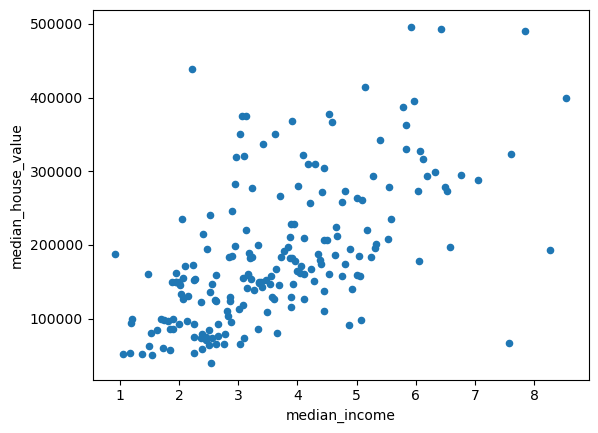

In [91]:
stratified_sampling.plot('median_income', 'median_house_value', kind='scatter')
plt.show()

이제 분산을 기준으로 두 표본을 비교해보자. 먼저 모집단의 가구소득과 주택가격의 (편향)분산을 출력해본다. `housing` 데이터프레임의 처음 두 열(특성)을 슬라이싱해서 `ddof=0` 인자를 사용해 분산을 구하면 된다.

- 모집단의 (편향)분산

In [92]:
housing.iloc[:, :2].var(ddof=0)

median_income         2.465628e+00
median_house_value    9.547054e+09
dtype: float64

- 층화표집 표본과 무작위 추출 표본의 불편분산

In [93]:
stratified_sampling.iloc[:, :2].var()

median_income         2.317274e+00
median_house_value    9.486647e+09
dtype: float64

In [94]:
random_sampling.iloc[:, :2].var()

median_income         2.412851e+00
median_house_value    8.780615e+09
dtype: float64

- 층화표집 표본과 무작위 추출 표본의 편향분산

In [95]:
stratified_sampling.iloc[:, :2].var(ddof=0)

median_income         2.305512e+00
median_house_value    9.438491e+09
dtype: float64

In [96]:
random_sampling.iloc[:, :2].var(ddof=0)

median_income         2.400603e+00
median_house_value    8.736043e+09
dtype: float64

결론적으로, 분산의 경우에도, 층화표집으로 생성된 표본의 불편분산이 모집단의 (편향)분산에 더 근접하며, 무작위 추출로 생성된 표본의 불편분산보다 작다.

또한 {numref}`%s장 <ch:hyp_testing>`에서 다루는 가설검정을 통해
층화표집으로 생성된 표본의 평균값이 무작위로 추출한 표본의 평균값보다 높은 확률로 모평균을 대변한다는 사실을 보여준다.

## 연습문제

참고: [(연습) 모집단과 표본](https://colab.research.google.com/github/codingalzi/statsRev/blob/master/practices/practice-sampling.ipynb)